In [21]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


# Compare models

In [22]:
# load sample dataset
from pycaret.datasets import get_data
import pandas as pd

data = pd.read_csv('data\Kangaroo_cleaned.csv')

In [24]:
data.isnull().sum() / len(data) * 100.

data['epcNumeric'].dtype

dtype('float64')

In [8]:
# Functionnal API
from pycaret.regression import RegressionExperiment
s = RegressionExperiment()
s.setup(data,
        target='price',
        train_size=0.8,
        imputation_type='simple',    
        numeric_imputation='median',
        categorical_imputation='mode',
        normalize=True,                  
        normalize_method='minmax',       # ou 'zscore'
        transformation=True,                          
        remove_multicollinearity=False,
        session_id=42)

,Description,Value
0,Session id,42
1,Target,price
2,Target type,Regression
3,Original data shape,"(66608, 26)"
4,Transformed data shape,"(66608, 70)"
5,Transformed train set shape,"(53286, 70)"
6,Transformed test set shape,"(13322, 70)"
7,Numeric features,12
8,Categorical features,9
9,Rows with missing values,94.1%


In [9]:
best = s.compare_models()
print(best)

LGBMRegressor(n_jobs=-1, random_state=42)


# Analyze Model

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

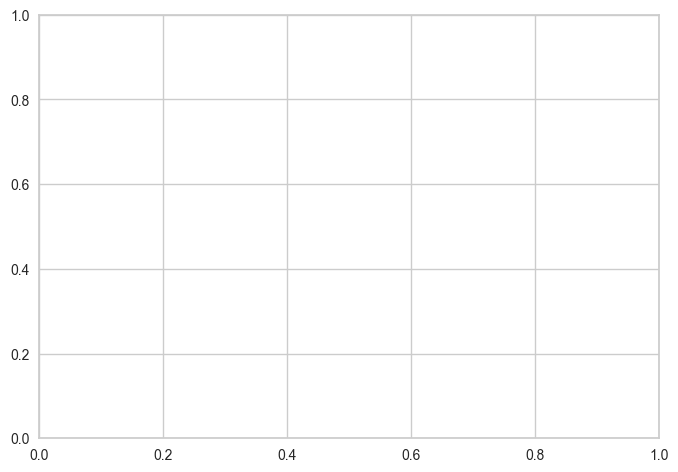

In [10]:
s.evaluate_model(best)

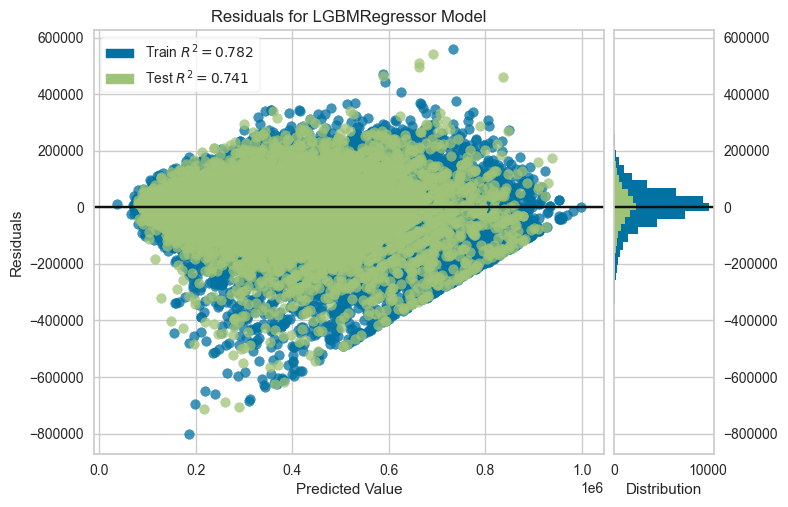

In [11]:
s.plot_model(best, plot = 'residuals')

KeyboardInterrupt: 

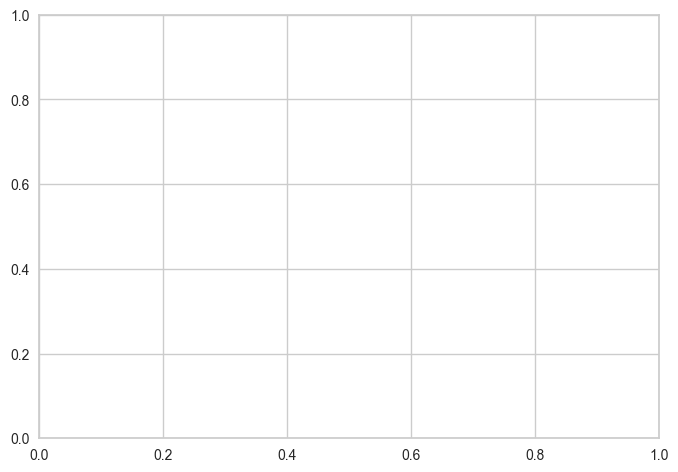

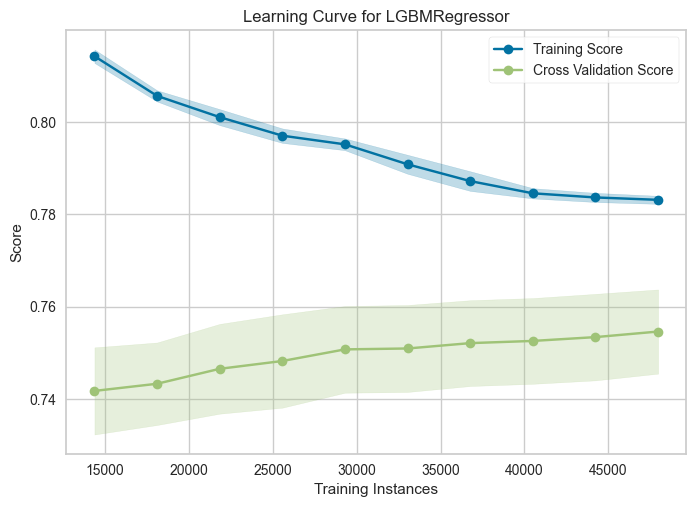

In [ ]:
s.plot_model(best, plot = 'learning')

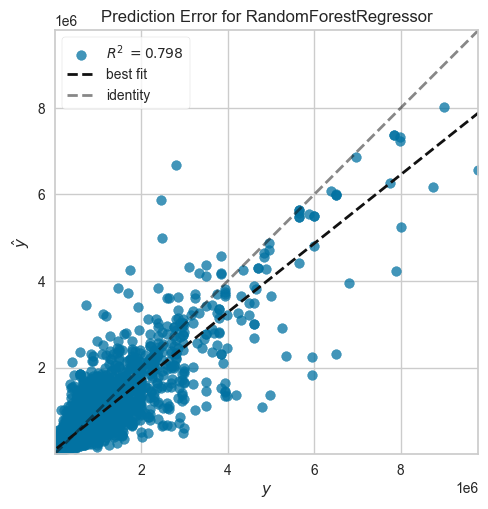

In [ ]:
s.plot_model(best, plot= 'error')

# Predictions

In [13]:
s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,60337.9149,7702934946.0545,87766.3657,0.7407,0.2654,0.2147


,type,bedroomCount,bathroomCount,province,locality,postCode,habitableSurface,buildingCondition,buildingConstructionYear,facedeCount,...,hasSwimmingPool,hasFireplace,hasTerrace,subtype_grouped,building_floors,apartment_floor,region,epcNumeric,price,prediction_label
57920,HOUSE,4.0,1.0,West Flanders,Izegem,8870,NaN,AS_NEW,1995.0,3.0,...,False,False,False,STANDARD_HOUSE,2,0,Flanders,300.0,570000,355014.409808
40124,HOUSE,3.0,NaN,Hainaut,Jumet,6040,134.0,TO_BE_DONE_UP,1920.0,3.0,...,False,False,True,STANDARD_HOUSE,3,0,Wallonia,510.0,160000,209140.403773
56076,APARTMENT,2.0,1.0,West Flanders,Oostrozebeke,8780,94.0,TO_BE_DONE_UP,2005.0,NaN,...,False,False,False,STANDARD_APARTMENT,0,0,Flanders,200.0,165000,211111.006265
23578,HOUSE,4.0,1.0,Antwerp,Niel,2845,275.0,GOOD,NaN,4.0,...,False,True,False,LUXURY_PROPERTY,1,0,Flanders,200.0,660000,582270.661672
51708,APARTMENT,2.0,1.0,West Flanders,Ichtegem,8480,72.0,GOOD,2019.0,NaN,...,False,False,False,STANDARD_APARTMENT,0,0,Flanders,100.0,219000,277545.103604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9501,APARTMENT,2.0,1.0,Flemish Brabant,Drogenbos,1620,76.0,TO_BE_DONE_UP,1979.0,3.0,...,False,False,True,STANDARD_APARTMENT,0,3,Flanders,400.0,245000,227361.870588
26967,HOUSE,5.0,2.0,Flemish Brabant,Rotselaar,3110,302.0,AS_NEW,2025.0,4.0,...,False,False,False,LUXURY_PROPERTY,0,0,Flanders,0.0,878000,841526.361590
55716,HOUSE,4.0,1.0,West Flanders,Wakken,8720,244.0,GOOD,NaN,NaN,...,False,False,False,STANDARD_HOUSE,0,0,Flanders,NaN,651036,425596.871210
15486,HOUSE,4.0,2.0,Flemish Brabant,RHODE-SAINT-GENÈSE,1640,195.0,JUST_RENOVATED,1950.0,4.0,...,False,True,True,LUXURY_PROPERTY,0,0,Flanders,400.0,749000,661485.529144


# Save model

In [14]:
s.save_model(best, 'pipeline_immo_eliza')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['bedroomCount', 'bathroomCount',
                                              'postCode', 'habitableSurface',
                                              'buildingConstructionYear',
                                              'facedeCount', 'landSurface',
                                              'gardenSurface', 'toiletCount',
                                              'building_floors',
                                              'apartment_floor', 'epcNumeric'],
                                     transformer=SimpleImputer(strategy='median'))),
                 ('categorical...
                                                               use_cat_names=True))),
                 ('rest_encoding',
                  TransformerWrapper(include=['locality'],
                                     transformer=TargetEncoder(cols=['locality'],
          